# DS-210: Programming for Data Science


# Lecture 7:<br>&nbsp;&nbsp;&nbsp;• Clustering<br>&nbsp;&nbsp;&nbsp;• $k$–means with SciPy


## Clustering

### General idea

- **Input:** set of objects
- Some information about relationship between them
- **Goal:** partition the objects into groups of similar objects

<br><br>
<div align="center">
    <b>Clearly: unsupervised learning</b>
</div>



### Why clustering?

* Discover similar cases<br>

* Make sense of data<br>

* Reduce data size<br>

## Examples of popular types of clustering

* correlation clustering (discovers the optimal number of clusters on its own, does not make sense for all problems but can be useful if the optimization metric rewards the creation of clusters with multiple points).

* Hierarchical clustering (HC). Can be bottoms up (agglomerative: merge points into clusters), or top down (divisive: divide clusters into subclusters).  $k$-means (to be covered today) is a divisive clustering algorithm.

## $k$–means

* $k$ is the target number of clusters<br><br>

* **Input:** set $S$ of points in $\mathbb R^n$<br><br>

* **Euclidean between points:**
$$\mbox{dist}(x,y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$

* **Ideal solution:** set $\mathcal C \subseteq \mathbb R^n$ of $k$ points that minimize
$$\sum_{x \in S} \min_{c \in \mathcal C}
(\mbox{dist}(x,c))^2$$<br><br>
(points in $\mathcal C$ are <i>cluster centers</i>)

* **Clusters:**
  - Assign each point $x \in S$ to the closest $c \in \mathcal C$
  - One cluster for each $c \in \mathcal C$:<br>the points assigned to it

### Reality

* [NP–hard](https://www.imsc.res.in/~meena/papers/kmeans.pdf) 

* Likely exponential time needed

### Typical heuristic

  1. *Seeding*: Start from some solution $\mathcal C$
  
  1. Keep improving $\mathcal C$ until satisfied

## Part 1: Initial solution (seeding)

### Example 1: random assignment

* Option 1: select $k$ points from $S$
  - likely to focus on the more populous parts of the data set

* Option 2: select $k$ points from the area to which points belong
  - points might end up outside of the area of interest
  - points may not be a minimum for any point in $S$

### Example 2: $k$–means$++$

* very popular heuristic

* iterative (i.e., add points one by one):

  - given current $\mathcal C$, assign weights to all points in $S$
  
  - $\mbox{weight(x)} = \min_{c \in \mathcal C} (\mbox{dist}(x,c))^2$
  
  - draw next point with probabilities proportional to the weights

* relatively good approximation in expectation
* If you want the gory details: http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf

## Part 2: Iterative improvement

### Typical iteration

* Assign each point in $x \in S$ to the closest center $c \in \mathcal C$

* For each $c \in \mathcal C$:
  - let $S_c$ be points assigned to $C$
  - move $c$ to 
    $$ \frac{1}{|S_c|}\sum_{y \in S_c} y$$
    if $S_c$ is not empty
  - Note: the new location minimizes
  $$\sum_{x \in S_c} (\mbox{dist}(x,c))^2$$
  - You can also some noise to the calculation of $c$ to improve odds of avoiding local minima.

### When to stop

* fixed number of steps?

* the solution has stopped improving?

### General problems

* may get stuck in a local minimum

* may improve very slowly

* possibly good ideas:
  - try different seeding methods
  - run multiple times from different starting points

## Example: Reduce number of colors in an image

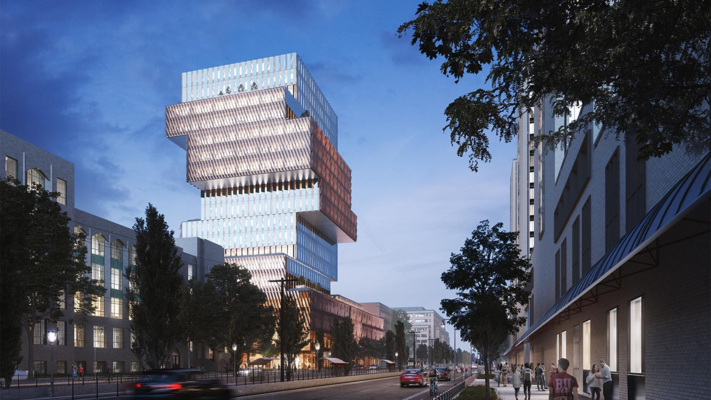

In [12]:
# PIL usually distributed as "Pillow"
# If you don't have it: pip3 install Pillow
from PIL import Image
import numpy as np
image = Image.open("cds.png")
image

### Typical color representation: RGB

* $(\mbox{red},\mbox{green},\mbox{blue})$, each in $0\ldots255$
* `uint8` = 8 bits = 1 byte

In [13]:
# Turn the image into a numpy array
arr = np.asarray(image)
print(arr.shape)
## drop additional transparency channel (alpha)
arr = arr[:,:,:3]
print(arr.shape)
arr

(400, 711, 4)
(400, 711, 3)


array([[[ 53,  82, 152],
        [ 52,  82, 152],
        [ 50,  80, 152],
        ...,
        [ 13,  13,  11],
        [ 12,  12,  10],
        [ 18,  18,  16]],

       [[ 56,  85, 156],
        [ 52,  81, 152],
        [ 51,  81, 153],
        ...,
        [ 14,  14,  12],
        [ 15,  15,  13],
        [ 18,  18,  16]],

       [[ 57,  85, 158],
        [ 52,  81, 153],
        [ 52,  82, 154],
        ...,
        [ 14,  14,  12],
        [ 14,  14,  12],
        [ 18,  18,  16]],

       ...,

       [[ 45,  47,  62],
        [ 39,  41,  56],
        [ 39,  41,  56],
        ...,
        [ 55,  58,  73],
        [ 55,  58,  73],
        [ 61,  64,  80]],

       [[ 48,  50,  63],
        [ 41,  43,  57],
        [ 41,  43,  56],
        ...,
        [ 50,  53,  67],
        [ 53,  57,  74],
        [ 57,  63,  81]],

       [[ 47,  49,  62],
        [ 41,  43,  56],
        [ 39,  41,  54],
        ...,
        [ 42,  44,  59],
        [ 39,  43,  61],
        [ 43,  50,  69]]

## Example: Reduce number of colors in an image

In [14]:
# save dimensions
height,width,color_dim = arr.shape
# turn into a "1D" array of pixels
arr = arr.reshape(-1,color_dim)
arr

array([[ 53,  82, 152],
       [ 52,  82, 152],
       [ 50,  80, 152],
       ...,
       [ 42,  44,  59],
       [ 39,  43,  61],
       [ 43,  50,  69]], dtype=uint8)

In [29]:
from scipy.cluster.vq import kmeans, kmeans2
arr = arr.astype(np.float32)
codebook,_ = kmeans(arr,16)
codebook2,_ = kmeans2(arr,16,minit='++')
print(codebook)
print(codebook2)

[[ 77.094734  88.77493  114.722275]
 [105.98211  148.63426  210.66179 ]
 [ 77.88892  124.33771  195.98706 ]
 [ 39.874424  39.781414  44.688553]
 [145.52745  176.27693  221.73686 ]
 [ 18.17652   18.308878  17.889544]
 [223.28003  226.44762  231.34659 ]
 [147.34657  140.4148   148.55267 ]
 [ 57.335213  67.9164    92.07207 ]
 [ 94.64662   79.18295   79.3447  ]
 [121.4037   109.16127  112.80058 ]
 [ 59.12366   54.92025   59.916264]
 [182.98862  199.3616   228.24649 ]
 [ 61.78435   94.21877  162.45345 ]
 [188.98924  180.02708  182.77838 ]
 [ 28.888018  28.21438   28.435467]]
[[ 38.320755  37.654724  41.06796 ]
 [225.68256  232.7497   239.38518 ]
 [ 62.090088  94.44181  162.33682 ]
 [ 99.03783  142.73462  207.14764 ]
 [183.14926  200.21082  229.5823  ]
 [144.87498  137.12144  144.59816 ]
 [154.08447  181.98982  224.70859 ]
 [ 58.231327  56.51919   64.63652 ]
 [117.35084  108.41629  114.72474 ]
 [125.48964  163.18895  216.89981 ]
 [ 68.993805  81.41534  108.828125]
 [ 76.67321  123.26979  195

## Example: Reduce number of colors in an image

In [30]:
# assign closest center to each pixel
from scipy.cluster.vq import vq
# create new array the tells use which codebook entry
# is to be used for each pixel
encoding,_ = vq(arr,codebook)
encoding2,_ = vq(arr,codebook2)
print(encoding)
print(encoding2)

[13 13 13 ...  3  3 11]
[2 2 2 ... 0 0 7]


In [31]:
# make color coordinates small integers
codebook = codebook.astype(np.uint8)
codebook2 = codebook2.astype(np.uint8)
print(codebook)
print(codebook2)


[[ 77  88 114]
 [105 148 210]
 [ 77 124 195]
 [ 39  39  44]
 [145 176 221]
 [ 18  18  17]
 [223 226 231]
 [147 140 148]
 [ 57  67  92]
 [ 94  79  79]
 [121 109 112]
 [ 59  54  59]
 [182 199 228]
 [ 61  94 162]
 [188 180 182]
 [ 28  28  28]]
[[ 38  37  41]
 [225 232 239]
 [ 62  94 162]
 [ 99 142 207]
 [183 200 229]
 [144 137 144]
 [154 181 224]
 [ 58  56  64]
 [117 108 114]
 [125 163 216]
 [ 68  81 108]
 [ 76 123 195]
 [176 169 175]
 [ 21  21  21]
 [210 203 204]
 [ 95  80  80]]


In [32]:
# Build new array by map entries to closest colors
newarr = [codebook[entry] for entry in encoding]
newarr = np.array(newarr)
print(newarr)
newarr2 = [codebook[entry] for entry in encoding]
newarr2 = np.array(newarr2)
print(newarr2)


[[ 61  94 162]
 [ 61  94 162]
 [ 61  94 162]
 ...
 [ 39  39  44]
 [ 39  39  44]
 [ 59  54  59]]
[[ 61  94 162]
 [ 61  94 162]
 [ 61  94 162]
 ...
 [ 39  39  44]
 [ 39  39  44]
 [ 59  54  59]]


In [33]:
# Make the new arrays to be the right shape
newarr = newarr.reshape(height,width,color_dim)
print(newarr)
newarr2 = newarr2.reshape(height,width,color_dim)
print(newarr2)

[[[ 61  94 162]
  [ 61  94 162]
  [ 61  94 162]
  ...
  [ 18  18  17]
  [ 18  18  17]
  [ 18  18  17]]

 [[ 61  94 162]
  [ 61  94 162]
  [ 61  94 162]
  ...
  [ 18  18  17]
  [ 18  18  17]
  [ 18  18  17]]

 [[ 61  94 162]
  [ 61  94 162]
  [ 61  94 162]
  ...
  [ 18  18  17]
  [ 18  18  17]
  [ 18  18  17]]

 ...

 [[ 59  54  59]
  [ 39  39  44]
  [ 39  39  44]
  ...
  [ 59  54  59]
  [ 59  54  59]
  [ 57  67  92]]

 [[ 59  54  59]
  [ 39  39  44]
  [ 39  39  44]
  ...
  [ 59  54  59]
  [ 59  54  59]
  [ 57  67  92]]

 [[ 59  54  59]
  [ 39  39  44]
  [ 39  39  44]
  ...
  [ 39  39  44]
  [ 39  39  44]
  [ 59  54  59]]]
[[[ 61  94 162]
  [ 61  94 162]
  [ 61  94 162]
  ...
  [ 18  18  17]
  [ 18  18  17]
  [ 18  18  17]]

 [[ 61  94 162]
  [ 61  94 162]
  [ 61  94 162]
  ...
  [ 18  18  17]
  [ 18  18  17]
  [ 18  18  17]]

 [[ 61  94 162]
  [ 61  94 162]
  [ 61  94 162]
  ...
  [ 18  18  17]
  [ 18  18  17]
  [ 18  18  17]]

 ...

 [[ 59  54  59]
  [ 39  39  44]
  [ 39  39  44]
  ..

## Example: Reduce number of colors in an image

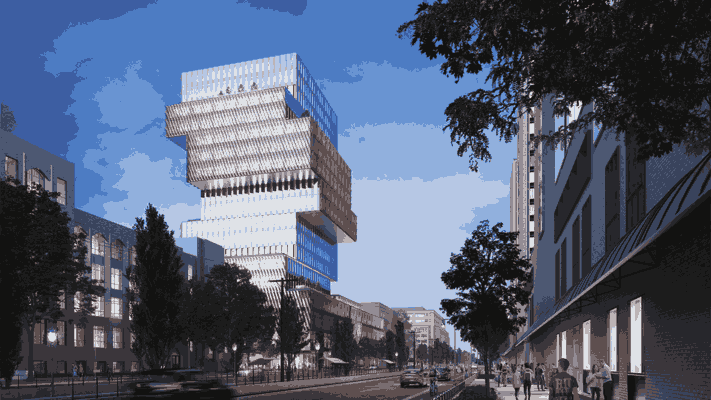

In [34]:
image = Image.fromarray(newarr)
image.save("test.png")
image

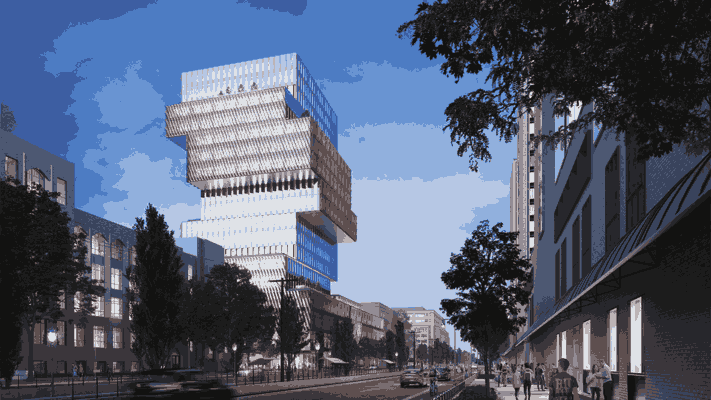

In [35]:
image2 = Image.fromarray(newarr2)
image2.save("test2.png")
image2

## Final comments

### Warning: Normalizing your data may be useful or crucial

* You have to make sure that all relevant coordinates have some impact

* **Sample solution:** make the variance / standard deviation of each coordinate identical

* Implemented as `scipy.cluster.vq.whiten`

### Some $k$–means implementations

* Two implementations in SciPy
  
  - `scipy.cluster.vq.kmeans`

  - `scipy.cluster.vq.kmeans2`

* `scikit-learn`: `sklearn.cluster.KMeans`

* Feel free to experiment to see which one is better